# Cálculo


No Cálculo podemos obter ferramentas para, por exemplo, achar valores mínimos ou máximos de funções.

In [1]:
%matplotlib inline 
# A linha acima permite que a visualização das plotagens sejam feitas
# no próprio JN;
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## Derivação e Diferenciação

Seja $f(x) = 3x^2 - 4x$. Sua derivada é $f'(x) = 6x - 4$, veja as contas abaixo:

In [2]:
def f(x):
    return 3*(x**2) - 4*x;

for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


A função acima aproxima $f'(1)$ sabendo que:

$$ f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

É possível visualizar o *slope* de uma função a partir da biblioteca de matplotlib. O *slope* de uma função é  variação de valor em relação à sua variável independente. Essa inclinação refere-se a quanto da função está mudando à medida que a variável independente está se alterando.

Essa inclinação pode ser calculada usando o conceito de derivada (veja a definição de derivada acima, faz sentido, não faz?) que determina a taxa de variação instantânea. 

Para fazer a visuação disso é preciso definir algumas funções. Veja abaixo:

A função abaixo coloca o formato do gráfico em svg que é um tipo de imagem baseada em descrições matemáticas e não em pixels como é o caso do JPEG e PNG. 

In [3]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

A função abaixo serve para configurar o tamanho das figuras que serão plotadas:

In [4]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize


Já a próxima refere-se a propriedades, rótulos e outras coisas desse tipo:

In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


A seguinte serve para permitir colocar várias linhas/curvas de funções em um mesmo gráfico. 

In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


Vamos finalmene plotar algo para ver como fica. Estamos plotando a função definida anteriormente, $f(x)$ e a reta tangente a essa função no ponto $x = 1$, lembrando que $f'(1) = 2$.

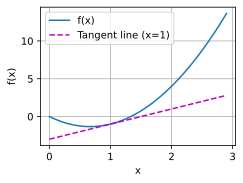

In [7]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

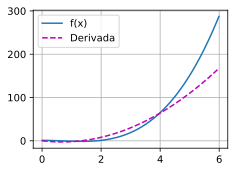

In [8]:
# Outro exemplo:
x = np.arange(0, 6, 0.01)
plot(x, [2*(x**3) - 4*(x**2) + 1, 6*(x**2) - 8*(x)], legend=['f(x)', 'Derivada'])

## Derivadas Parciais e Gradientes

Vamos revisar derivadas de funções com múltiplas variáveis. COnsidere a função abaixo:

$$y = f(x_1, x_2, \dots, x_n)$$

A derivada parcial de y em respeito a um parâmetro $i$ é dada por:

$$ \frac{dy}{dx_i} = \lim_{h \to 0} \frac{f(x_1, \dots, x_{i-1}, x_i - h, x_{i+1}, \dots, x_n) - f(x_1, \dots, x_i, \dots, x_n)}{h}$$

Concatenando a derivadas parciais de cada uma das múltiplas variáveis de uma função obtemos um vetor chamado de **Vetor Gradiente**. Suponha uma função $f: \mathbb{R}^n \to \mathbb{R}$ que mapeia um vetor de n dimensões para um escalar. Seja $x = [x_1, x_2, \dots, x_n]^T$ um vetor, o vetor gradiente em respeito a x é dado por:

$$ ∇_xf(x) = [\frac{df}{dx_1}, \frac{df}{dx_2}, \dots, \frac{df}{dx_n}]$$

O vetor gradiente aponta na direção de maior aumento da função em um determinado ponto. Como o vetor gradiente é formado pelas derivadas parciais da função, cada componente do vetor indica a taxa de variação da função em relação a uma determinada direção/dimensão. Assim, para cada ponto, ele aponta para onde a função tem uma taxa de variação positiva. 

O vetor gradiente tem algumas propriedades interessantes:
- Para todo $A \in \mathbb{R}^{m*n}$ temos que $∇_xA*x = A^T$ e $∇_xx^T*A = A$
    - Ou seja, para toda matriz A, o vetor gradiente da função $Ax$ resulta na transposta de A e o vetor gradiente da função $x^TA$ resulta na própria matriz A;
- Para matrizes quadradas $A \in \mathbb{R}^{n*n}$ temos que $∇_xx^TAx = (A + A^T)x$ e $∇_x\|x\|^2 = ∇_xx^Tx = 2x$
    - Por que? Não sei, terei que estudar essa parte.

## Chain Rule - Regra da Cadeia

Como o **Vetor Gradiente** depende de derivadas, em muitos momento, será necessário aplicar a regra da cadeia para a derivação. Que é basicamente:

$$ f(g(x)) = f'(g(x)) * g'(x)$$

Dessa forma, seja $y = f(g(x))$, assim $y = f(u)$ e $u = g(x)$. Assim, a regra acima pode ser escrita como:

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$$

Para funções com multiváriaveis, suponha que $y = f(u)$ e $u = [u_1, u_2, u_3, \dots, u_m]$, de forma que $u = g(x)$ com $u_i = g_i(x)$ e $x = [x_1, x_2, x_3, \dots, x_n]$. Dessa forma, a regra fica da seguinte forma:

$$ \frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \dots + \frac{dy}{du_m} \frac{du_m}{dx_i} = ∇_xy = A∇_uy$$

$∇_xy$ é o vetor gradiente da função y no ponto x. Já a matriz $A$ em $A∇_uy$, com $A \in \mathbb{R}^{n*m}$ , é uma matriz com as derivadas do vetor u em respeito a x. Assim, computar o vetor gradiente requer computar uma operação entre um vetor e uma matriz. 